In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(10,6)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')

display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("Statistical Summary:")
print(df.describe)


Statistical Summary:
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
#clustering based on annual income and spending score according to task, so we will select those features
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
X.columns== ['AnnualIncome', 'SpendingScore']
print("\nselected features for clustering:")
print(X.head())


selected features for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [ ]:
#Kmeans is distance based algorithm so we need feature scaling
Scaler=StandardScaler()
X_scaled=Scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled, columns=['AnnualIncome_Scaled', 'SpendingScore_Scaled'])
print('Scaled Data (first 5 rows):')
print(X_scaled_df.head())

Scaled Data (first 5 rows):
   AnnualIncome_Scaled  SpendingScore_Scaled
0            -1.738999             -0.434801
1            -1.738999              1.195704
2            -1.700830             -1.715913
3            -1.700830              1.040418
4            -1.662660             -0.395980


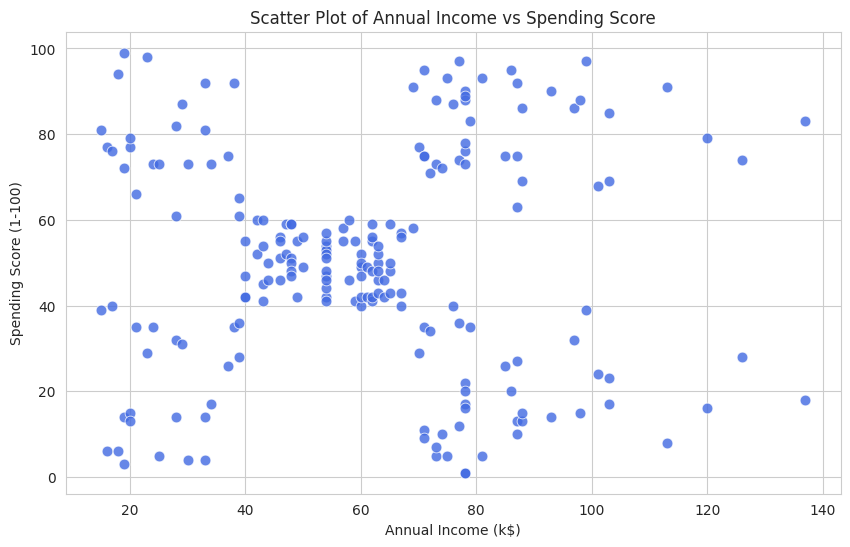

In [ ]:
plt .figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, alpha=0.8, color='royalblue')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

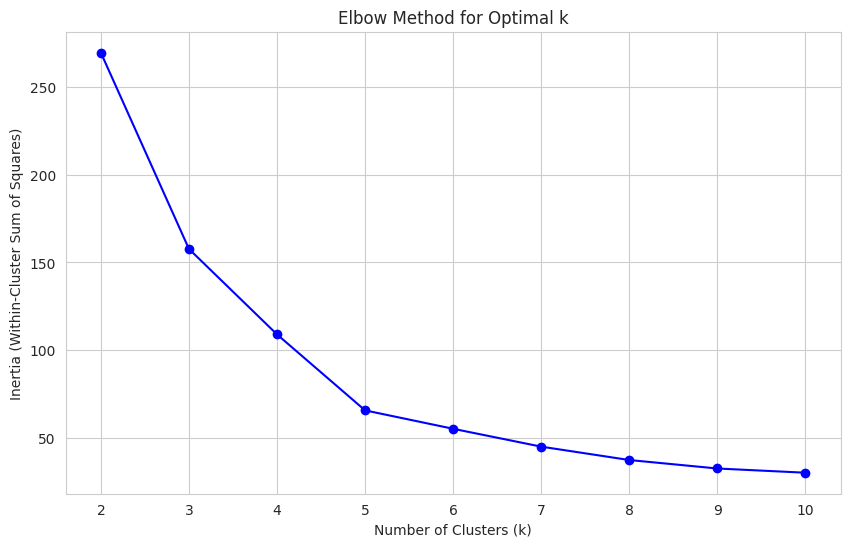

For k = 2, Silhouette Score = 0.3213
For k = 3, Silhouette Score = 0.4666
For k = 4, Silhouette Score = 0.4939
For k = 5, Silhouette Score = 0.5547
For k = 6, Silhouette Score = 0.5399
For k = 7, Silhouette Score = 0.5281
For k = 8, Silhouette Score = 0.4552
For k = 9, Silhouette Score = 0.4571
For k = 10, Silhouette Score = 0.4432


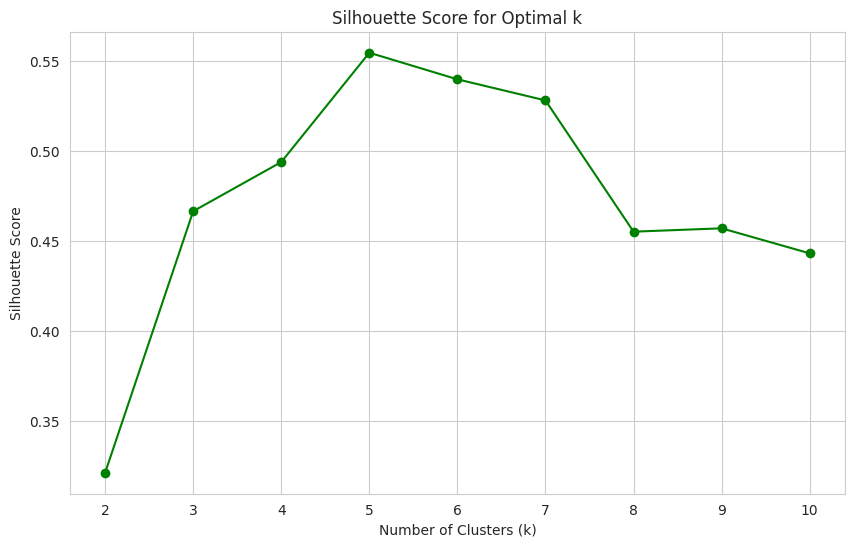

In [ ]:
inertia = []
k_range = range(2, 11) # Testing from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"For k = {k}, Silhouette Score = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range)
plt.show()

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
X['Cluster'] = kmeans.labels_
print("Number of customers in each cluster:")
print(df['Cluster'].value_counts().sort_index())

Number of customers in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


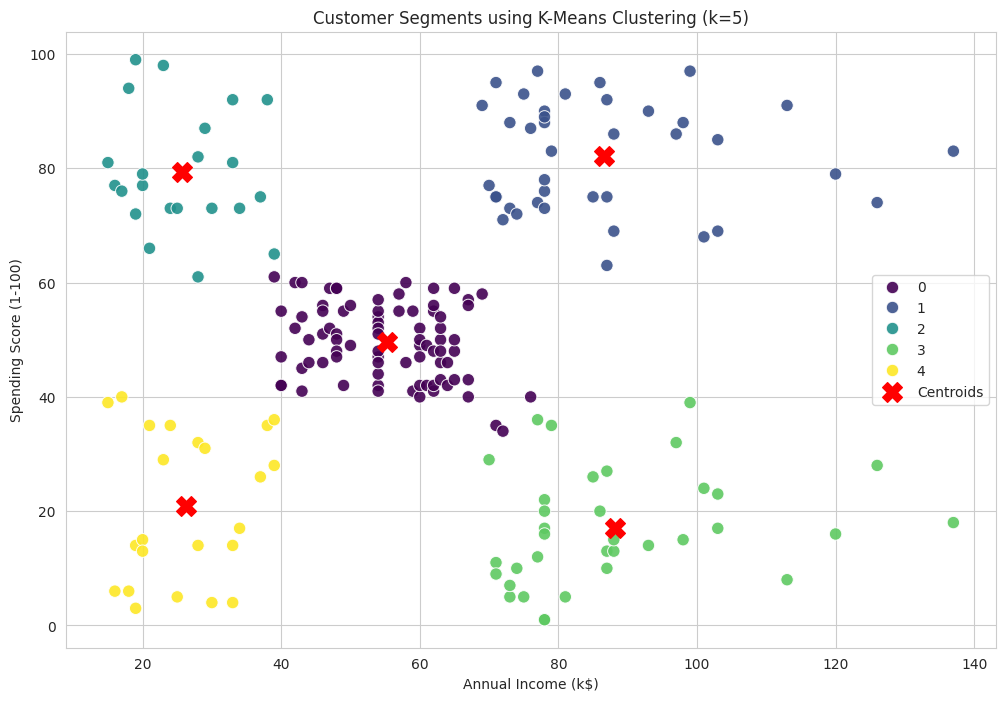

In [ ]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=X, palette='viridis', s=80, alpha=0.9)
centers = Scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=1.0, label='Centroids')

plt.title('Customer Segments using K-Means Clustering (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Final DBSCAN Silhouette Score (noise): 0.6073


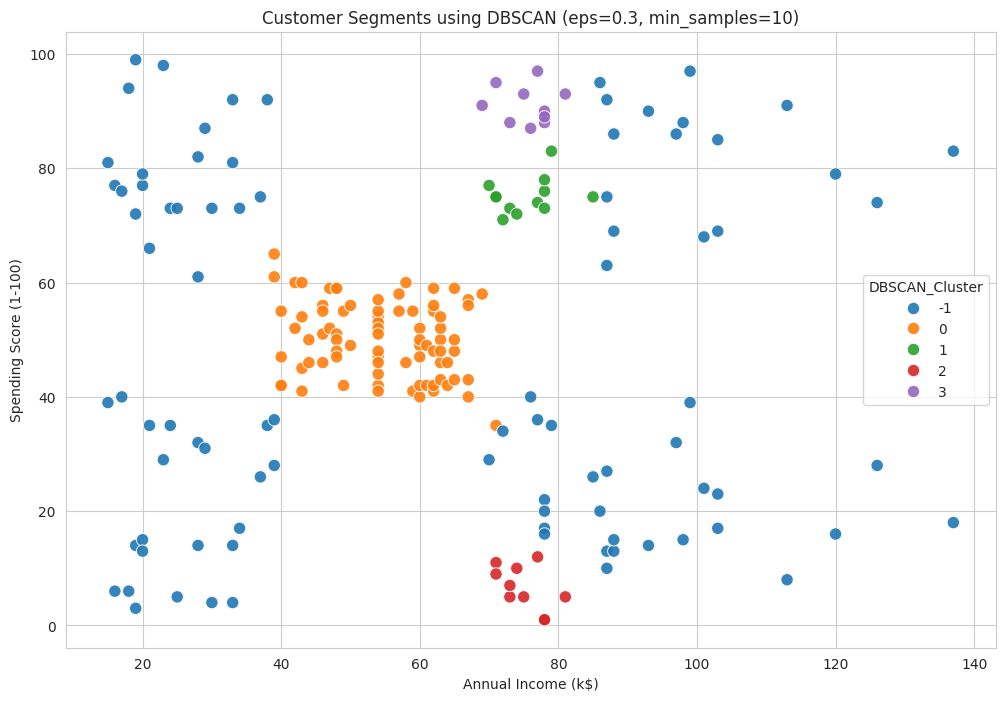

In [ ]:
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_labels = dbscan.fit_predict(X_scaled)
X['DBSCAN_Cluster'] = dbscan_labels

mask = dbscan_labels != -1
if sum(mask) > 0 and len(set(dbscan_labels[mask])) > 1:
    best_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print(f"Final DBSCAN Silhouette Score (noise): {best_score:.4f}")
else:
    print("Only noise detected. Try different parameters.")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    data=X,
    palette='tab10',
    s=80, alpha=0.9
)
plt.title(f'Customer Segments using DBSCAN (eps={best_params[0]}, min_samples={best_params[1]})')
plt.show()
